![](https://www.dii.uchile.cl/wp-content/uploads/2021/06/Magi%CC%81ster-en-Ciencia-de-Datos.png)


# Proyecto: Riesgo en el Banco Giturra

### **MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

#### Cuerpo Docente:

- Profesor: Gabriel Iturra, Ignacio Meza De La Jara
- Auxiliar: Sebastián Tinoco
- Ayudante: Arturo Lazcano, Angelo Muñoz

#### Integrantes:

- Nicolás Becerra Pinto
- Simón Sanfeliú Álvarez

### 1. Introducción

### 2. Preparación de Datos

In [1]:
import pandas as pd 
df = pd.read_parquet('dataset.pq')
df.head()

,customer_id,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,...,4.0,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,0
1,CUS_0x21b1,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,3,...,2.0,605.03,32.933856,27.0,No,18.816215,218.904344,Low_spent_Small_value_payments,356.078109,0
2,CUS_0x2dbc,34.0,Engineer,143162.64,12187.220000,1,5,8,3.0,8,...,3.0,1303.01,38.374753,18.0,No,246.992319,10000.000000,High_spent_Small_value_payments,895.494583,0
3,CUS_0xb891,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,-100.0,4,...,4.0,632.46,27.332515,17.0,No,16.415452,125.617251,High_spent_Small_value_payments,379.216381,0
4,CUS_0x1cdb,21.0,Developer,35547.71,2853.309167,7,5,5,-100.0,1,...,4.0,943.86,25.862922,31.0,Yes,0.000000,181.330901,High_spent_Small_value_payments,364.000016,0


In [31]:
# Creando un dataset sin los ID
data = df.copy()
data = df.drop(columns="customer_id")
data

,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,...,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,6.0,...,4.0,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,0
1,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,3,4.0,...,2.0,605.03,32.933856,27.0,No,18.816215,218.904344,Low_spent_Small_value_payments,356.078109,0
2,34.0,Engineer,143162.64,12187.220000,1,5,8,3.0,8,6.0,...,3.0,1303.01,38.374753,18.0,No,246.992319,10000.000000,High_spent_Small_value_payments,895.494583,0
3,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,-100.0,4,9.0,...,4.0,632.46,27.332515,17.0,No,16.415452,125.617251,High_spent_Small_value_payments,379.216381,0
4,21.0,Developer,35547.71,2853.309167,7,5,5,-100.0,1,15.0,...,4.0,943.86,25.862922,31.0,Yes,0.000000,181.330901,High_spent_Small_value_payments,364.000016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,19.0,Lawyer,42903.79,3468.315833,0,4,6,1.0,9,NaN,...,1.0,1079.48,35.716618,28.0,No,34.975457,115.184984,High_spent_Medium_value_payments,NaN,0
12496,45.0,Media_Manager,16680.35,NaN,1,1,5,4.0,1,0.0,...,8.0,897.16,41.212367,NaN,No,41.113561,70.805550,Low_spent_Large_value_payments,NaN,0
12497,50.0,Writer,37188.10,3097.008333,1,4,5,3.0,7,9.0,...,3.0,620.64,39.300980,30.0,No,84.205949,42.935566,High_spent_Medium_value_payments,NaN,0
12498,29.0,Architect,20002.88,1929.906667,10,8,29,5.0,33,25.0,...,9.0,3571.70,37.140784,6.0,Yes,60.964772,34.662906,High_spent_Large_value_payments,NaN,0


In [34]:
data.describe()

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance,credit_score
count,12500.000000,1.250000e+04,10584.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,11660.00000,12246.000000,12243.000000,12500.000000,12500.000000,11380.000000,12500.000000,11914.000000,1.214500e+04,12500.000000
mean,105.771840,1.616206e+05,4186.634963,16.939920,23.172720,73.213360,3.099440,21.060880,32.93542,10.398582,26.292330,1426.220376,32.349265,18.230404,1488.394291,638.798715,-2.744614e+22,0.288160
std,664.502705,1.297842e+06,3173.690362,114.350815,132.005866,468.682227,65.105277,14.863091,237.43768,6.799253,181.821031,1155.169458,5.156815,8.302078,8561.449910,2049.195193,3.024684e+24,0.452924
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,-100.000000,-5.000000,-3.00000,-6.490000,0.000000,0.230000,20.100770,0.000000,0.000000,0.000000,-3.333333e+26,0.000000
25%,25.000000,1.945333e+04,1622.408646,3.000000,4.000000,8.000000,1.000000,10.000000,9.00000,5.370000,4.000000,566.072500,28.066517,12.000000,31.496968,73.736810,2.701501e+02,0.000000
50%,33.000000,3.757238e+04,3087.595000,6.000000,5.000000,14.000000,3.000000,18.000000,14.00000,9.410000,6.000000,1166.155000,32.418953,18.000000,72.887628,134.093193,3.393885e+02,0.000000
75%,42.000000,7.269021e+04,5967.937500,7.000000,7.000000,20.000000,5.000000,28.000000,18.00000,14.940000,10.000000,1945.962500,36.623650,25.000000,169.634826,261.664256,4.714245e+02,1.000000
max,8678.000000,2.383470e+07,15204.633333,1756.000000,1499.000000,5789.000000,1495.000000,67.000000,4293.00000,36.970000,2554.000000,4998.070000,48.199824,33.000000,81971.000000,10000.000000,1.463792e+03,1.000000


In [25]:
# Arreglando datos categóricos
data.occupation = data.occupation.apply(lambda x: 'No_knwon_occupation' if x == '_______' else x)
data.payment_of_min_amount = data.payment_of_min_amount.apply(lambda x: 'No' if x == 'NM' else x)
data.payment_behaviour = data.payment_behaviour.apply(lambda x: 'No_knwon_behaviour' if x == '!@9#%8' else x)

#### 2.1 Preprocesamiento con `ColumnTransformer`

In [124]:
def outlier_thresholds(df, col_name, low_quantile=0.25, up_quantile=0.75):
    Q1=df[col_name].quantile(low_quantile)
    Q3=df[col_name].quantile(up_quantile)
    IQR=Q3-Q1
    low_limit=Q1-1.5*IQR
    up_limit=Q3+1.5*IQR
    return low_limit, up_limit


def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe,col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
    

# Let's fill the outliers with the median value of the relevant variable
def replace_with_thresholds(dataframe):
    for variable in dataframe.columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = dataframe[variable].median()
        dataframe.loc[(dataframe[variable] > up_limit), variable] = dataframe[variable].median()

    return dataframe

In [125]:
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separando los datos en numéricos y categóricos
num_cols = data.corr(numeric_only=True).columns.to_list()
num_cols.remove("credit_score")
cat_cols = [col for col in data.columns if not col in num_cols]

# Atributos numéricos
num_pipe = Pipeline([
                ('Outlier scaler', FunctionTransformer(replace_with_thresholds)),
                ('Standard scaler', StandardScaler())
            ])
# Atributos categóricos
cat_pipe = Pipeline([
    ('Encoder', OrdinalEncoder())
])

# Creando ColumnTransformer
ctrans = ColumnTransformer(
        transformers=[
            ("Categorico", cat_pipe, cat_cols),
            ("Numerico", num_pipe, num_cols),
        ]
)
ctrans.set_output(transform='pandas')

C:\Users\sanfe\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_function_transformer.py:345: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


ColumnTransformer(transformers=[('Categorico',
                                 Pipeline(steps=[('Encoder',
                                                  OrdinalEncoder())]),
                                 ['occupation', 'payment_of_min_amount',
                                  'payment_behaviour', 'credit_score']),
                                ('Numerico',
                                 Pipeline(steps=[('Outlier scaler',
                                                  FunctionTransformer(func=<function replace_with_thresholds at 0x0000018F311D7C70>)),
                                                 ('Standard scaler',
                                                  StandardScaler())]),
                                 ['age', 'annual_income',
                                  'monthly_inhand_salary', 'num_bank_accounts',
                                  'num_credit_card', 'interest_rate',
                                  'num_of_loan', 'delay_from_due_date',
                                  'num_of_delayed_payment',
                                  'changed_credit_limit',
                                  'num_credit_inquiries', 'outstanding_debt',
                                  'credit_utilization_ratio',
                                  'credit_history_age', 'total_emi_per_month',
                                  'amount_invested_monthly',
                                  'monthly_balance'])])

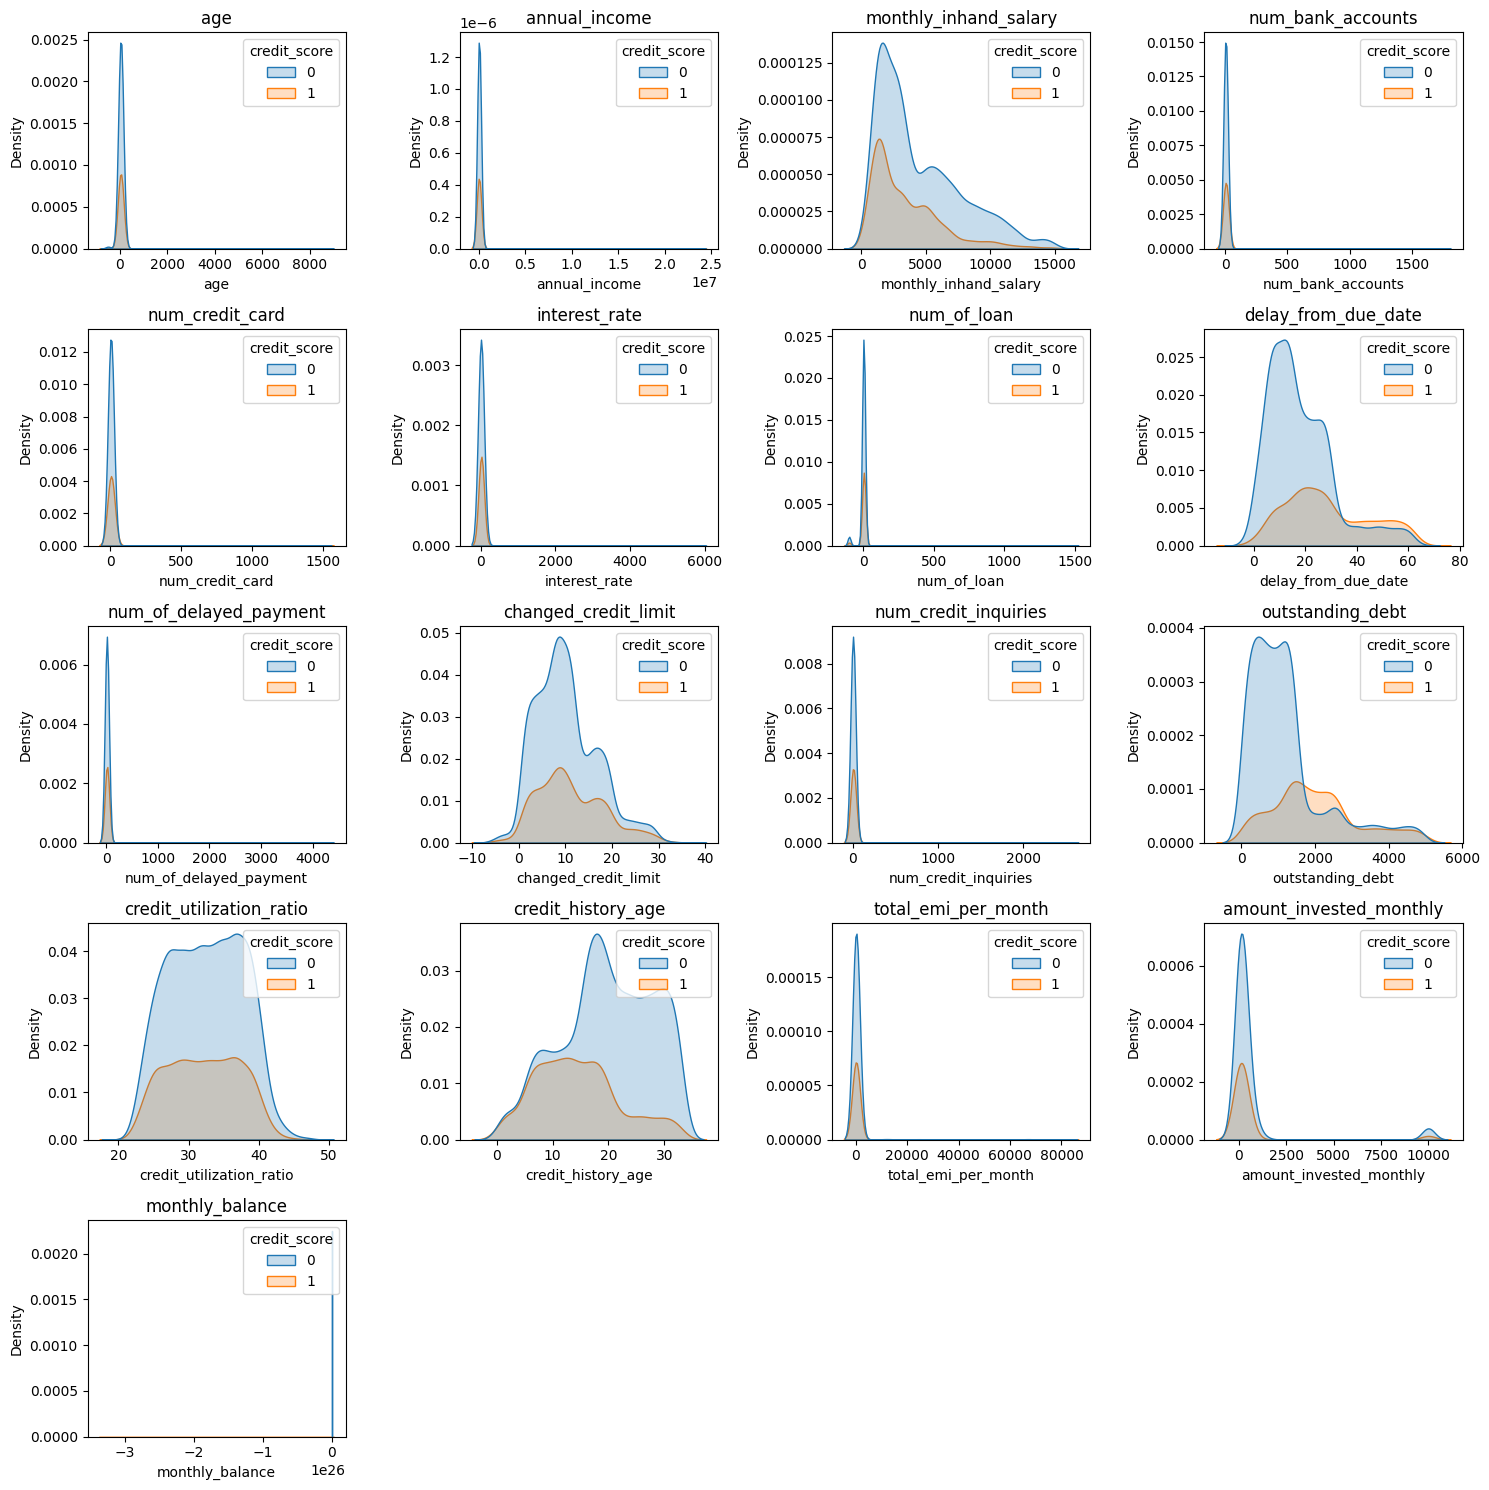

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
for ax, col in enumerate(num_cols):
    plt.subplot(5,4, ax+1)
    plt.title(col)
    sns.kdeplot(x=data[col],fill=True, hue=data["credit_score"], warn_singular=False)

plt.tight_layout()

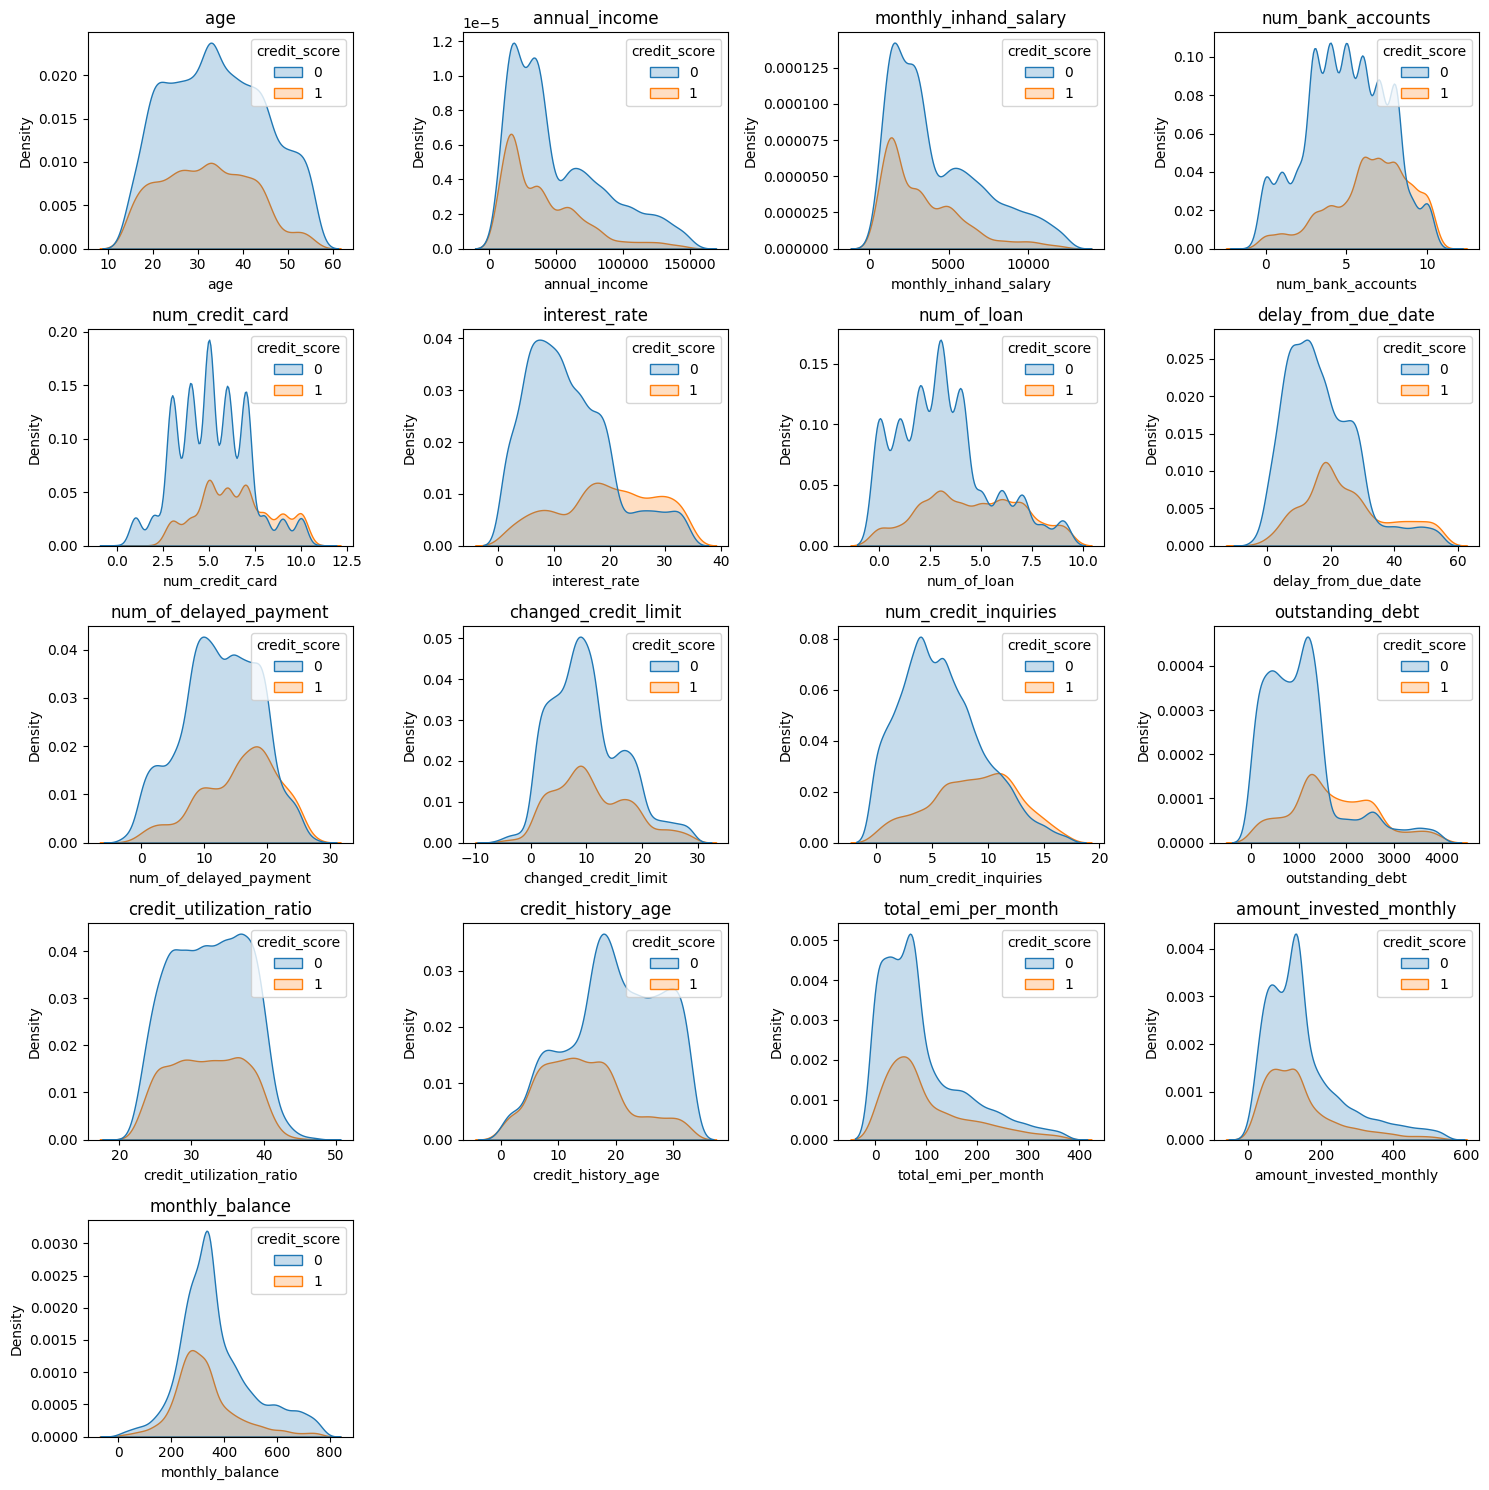

In [127]:
data_copy = data.copy()
data_copy = replace_with_thresholds(data_copy[num_cols])
plt.figure(figsize=(15,15))
for ax, col in enumerate(num_cols):
    plt.subplot(5,4, ax+1)
    plt.title(col)
    sns.kdeplot(x=data_copy[col],fill=True, hue=data["credit_score"], warn_singular=False)

plt.tight_layout()

In [128]:
# Probando
test_data = ctrans.fit_transform(data)
test_data

,Categorico__occupation,Categorico__payment_of_min_amount,Categorico__payment_behaviour,Categorico__credit_score,Numerico__age,Numerico__annual_income,Numerico__monthly_inhand_salary,Numerico__num_bank_accounts,Numerico__num_credit_card,Numerico__interest_rate,...,Numerico__delay_from_due_date,Numerico__num_of_delayed_payment,Numerico__changed_credit_limit,Numerico__num_credit_inquiries,Numerico__outstanding_debt,Numerico__credit_utilization_ratio,Numerico__credit_history_age,Numerico__total_emi_per_month,Numerico__amount_invested_monthly,Numerico__monthly_balance
0,12.0,1.0,2.0,0.0,-0.997389,-0.833823,-0.749958,-0.919396,-0.743524,-1.333257,...,-1.298755,-1.167804,0.153406,-0.663253,-0.491741,-1.631977,NaN,-0.508201,-1.168243,0.012981
1,13.0,1.0,6.0,0.0,-0.527068,-0.380583,-0.329758,-1.306921,-0.743524,-0.986784,...,-1.298755,-1.486388,-0.733631,-1.167613,-0.720976,0.113367,1.056360,-0.879342,0.639268,-0.001987
2,4.0,1.0,3.0,0.0,0.037317,2.739634,2.839294,-1.694447,-0.255186,-0.755801,...,-0.902710,-1.167804,-0.478893,-0.915433,0.059709,1.168498,-0.027754,1.873878,-0.150438,-0.124080
3,5.0,1.0,3.0,0.0,2.012665,-0.500360,-0.477138,-1.306921,-0.255186,-1.217766,...,-1.219546,-0.689928,-1.253723,-0.663253,-0.690296,-0.972878,-0.148211,-0.908310,-0.229361,0.167281
4,2.0,2.0,3.0,0.0,-1.185517,-0.360421,-0.393725,0.630705,-0.255186,-1.102275,...,-1.457173,0.265824,-1.164261,-0.663253,-0.341998,-1.257870,1.538188,-1.106383,0.289409,0.055965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,7.0,1.0,2.0,0.0,-1.373645,-0.148515,-0.180703,-2.081972,-0.743524,-0.986784,...,-0.823501,NaN,-0.782153,-1.419793,-0.190308,0.653017,1.176817,-0.684362,-0.326499,NaN
12496,10.0,1.0,4.0,0.0,1.072023,-0.903932,NaN,-1.694447,-2.208537,-1.102275,...,-1.457173,-2.123556,-0.692691,0.345468,-0.394231,1.718785,NaN,-0.610298,-0.739731,NaN
12497,14.0,1.0,2.0,0.0,1.542344,-0.313167,-0.309314,-1.694447,-0.743524,-1.102275,...,-0.981919,-0.689928,-0.739697,-0.915433,-0.703517,1.348118,1.417731,-0.090336,-0.999238,NaN
12498,1.0,2.0,1.0,0.0,-0.433004,-0.808220,-0.713567,1.793281,1.209828,1.669511,...,1.077515,1.858743,1.220883,0.597648,2.597221,0.929200,-1.473239,-0.370769,-1.076268,NaN


In [129]:
test_data.describe()

,Categorico__occupation,Categorico__payment_of_min_amount,Categorico__payment_behaviour,Categorico__credit_score,Numerico__age,Numerico__annual_income,Numerico__monthly_inhand_salary,Numerico__num_bank_accounts,Numerico__num_credit_card,Numerico__interest_rate,...,Numerico__delay_from_due_date,Numerico__num_of_delayed_payment,Numerico__changed_credit_limit,Numerico__num_credit_inquiries,Numerico__outstanding_debt,Numerico__credit_utilization_ratio,Numerico__credit_history_age,Numerico__total_emi_per_month,Numerico__amount_invested_monthly,Numerico__monthly_balance
count,12500.000000,12500.000000,12500.000000,12500.000000,1.250000e+04,1.250000e+04,1.058400e+04,1.250000e+04,1.250000e+04,1.250000e+04,...,1.250000e+04,1.166000e+04,1.224600e+04,1.224300e+04,1.250000e+04,1.250000e+04,1.138000e+04,1.250000e+04,1.191400e+04,1.214500e+04
mean,7.514720,1.410640,3.454080,0.288160,1.782041e-16,-1.089973e-16,-3.927320e-17,-1.566036e-16,-1.693934e-16,-7.162271e-17,...,-6.792789e-17,4.692263e-17,7.426872e-17,5.252317e-17,7.958079e-18,-7.503331e-17,9.365678e-17,-5.684342e-19,-1.699720e-16,-9.214531e-17
std,4.641998,0.687119,2.044404,0.452924,1.000040e+00,1.000040e+00,1.000047e+00,1.000040e+00,1.000040e+00,1.000040e+00,...,1.000040e+00,1.000043e+00,1.000041e+00,1.000041e+00,1.000040e+00,1.000040e+00,1.000044e+00,1.000040e+00,1.000042e+00,1.000041e+00
min,0.000000,0.000000,0.000000,0.000000,-1.843966e+00,-1.182622e+00,-1.276861e+00,-2.469497e+00,-2.696875e+00,-1.564239e+00,...,-1.932427e+00,-2.601432e+00,-2.539548e+00,-1.671973e+00,-1.397441e+00,-2.375300e+00,-2.195981e+00,-1.106383e+00,-1.399026e+00,-2.604083e+00
25%,3.000000,1.000000,2.000000,0.000000,-8.092604e-01,-8.240511e-01,-8.200763e-01,-9.193961e-01,-7.435237e-01,-7.558014e-01,...,-7.442920e-01,-6.899281e-01,-7.412130e-01,-6.632526e-01,-7.645501e-01,-8.305356e-01,-7.504962e-01,-7.263337e-01,-7.124374e-01,-6.305897e-01
50%,7.000000,2.000000,3.000000,0.000000,-5.674703e-02,-3.021193e-01,-3.127198e-01,2.431799e-01,-2.551858e-01,-6.285487e-02,...,-1.106201e-01,1.065316e-01,-1.286267e-01,-1.588923e-01,-9.340447e-02,1.351444e-02,-2.775382e-02,-2.269737e-01,-1.505919e-01,-1.240803e-01
75%,12.000000,2.000000,6.000000,1.000000,7.898305e-01,5.934349e-01,5.998606e-01,6.307052e-01,7.214899e-01,6.300917e-01,...,5.230518e-01,7.436994e-01,6.674322e-01,5.976483e-01,3.951781e-01,8.289139e-01,8.154456e-01,4.541037e-01,3.461058e-01,4.423917e-01
max,15.000000,2.000000,6.000000,1.000000,2.106729e+00,3.008134e+00,2.941593e+00,2.180807e+00,2.674842e+00,2.246967e+00,...,2.820112e+00,2.336619e+00,2.885783e+00,2.615090e+00,3.092321e+00,3.073834e+00,1.779102e+00,3.437264e+00,3.650049e+00,3.048193e+00


#### 2.2 Holdout 

In [130]:
from sklearn.model_selection import train_test_split

# Definiendo la semilla
RANDOM_STATE = 42

# Separación de características y target
X = data.drop(columns="credit_score")
y = data["credit_score"]

# Separando el conjunto de datos (70 / 20 / 10)
X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=.3, random_state=RANDOM_STATE, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=.33, random_state=RANDOM_STATE)

#### 2.3 Datos nulos

POR QUÉ LOS ELIMINAMOS?

#### 2.4 Feature Engineering [Bonus]

### 3. Baseline

In [ ]:
df = df.astype(
    {
        "age": float,
        "occupation": str,
        "annual_income": float,
        "monthly_inhand_salary": float,
        "num_bank_accounts": int,
        "num_credit_card": int,
        "interest_rate": float,
        "num_of_loan": int,
        "delay_from_due_date": int,
        "num_of_delayed_payment": int,
        "changed_credit_limit": float,
        "num_credit_inquiries": int,
        "outstanding_debt": float,
        "credit_utilization_ratio": float,
        "credit_history_age": int,
        "payment_of_min_amount": str,
        "total_emi_per_month": float,
        "amount_invested_monthly": float,
        "payment_behaviour": str,
        "monthly_balance": float
    }
)

### 4. Optimización del Modelo

#### Bonus

1. **Visualización con Optuna** [0.2 extras]: Explore la documentación de visualización de Optuna en el siguiente [link](https://optuna.readthedocs.io/en/stable/reference/visualization/index.html) y realice un análisis sobre el proceso de optimización de hiperparámetros realizado.
2. **Imbalanced learn** [0.3 extras]: Al ser el problema desbalanceado, pueden probar técnicas para balancear automáticamente el dataset previo a ejecutar el modelo. Para esto, puede probar con los mecanismos implementados en la librería [Imbalanced learn](https://imbalanced-learn.org/). 
3. **Probar pycaret (AutoML)** [0.3 extras]: Pueden probar la librería [pycaret](https://pycaret.org/) para realizar un proceso de AutoML. Para esto, pueden utilizar el siguiente [tutorial](https://pycaret.org/classification/).

### 5. Interpretabilidad 

### 6. Conclusiones

### 7. Bonus: Implementación de Kedro y FastAPI